# Twitter Syntimental Analysis

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.



In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk

# Data LOading and Pre Processing 

In [3]:
df = pd.read_csv(r"C:\Users\reals\Desktop\prodigy_task_1\Twitter syntiments.csv")
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
# data Type info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
# Removing patterns in the tweet 
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for word in r:
        input_txt = re.sub(word, "",input_txt)
    return input_txt    


In [6]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
# Removing twitter handles (@User)
df['Clean_tweets'] = np.vectorize(remove_pattern)(df['tweet'],'@[\w]*')

In [8]:
df.head()

,id,label,tweet,Clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
# Removing Special Characters from tweet
df['Clean_tweets'] = df['Clean_tweets'].replace('[^a-zA-Z#]', ' ', regex=True)

In [10]:
df

,id,label,tweet,Clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised in in #calgary #wso...


In [11]:
# Remove short words
df['Clean_tweets'] = df['Clean_tweets'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))
df.head()


,id,label,tweet,Clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [12]:
# Individual word's considered as tokens
tokenized_tweet = df['Clean_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Clean_tweets, dtype: object

In [13]:
# Steming the words 
from nltk.stem .porter import PorterStemmer
stemer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemer.stem(word) for word in sentence] )
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Clean_tweets, dtype: object

In [14]:
# Combining  words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['Clean_tweets'] = tokenized_tweet
df.head()

,id,label,tweet,Clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory Data Analysis

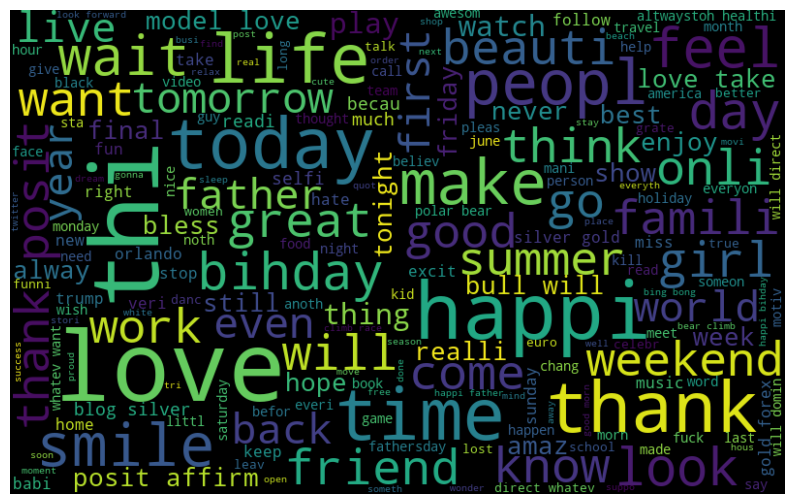

In [16]:
# Visualizing the frequent word 
all_words = " ".join([sentence for sentence in df['Clean_tweets']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width =800 , height=500, random_state = 43, max_font_size =100).generate(all_words)

#Ploting the graph
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

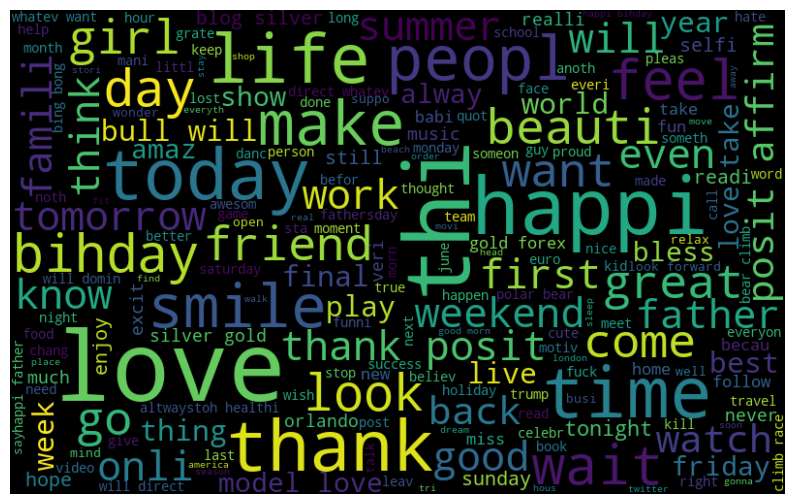

In [17]:
# Visualizing the positive words
all_words = " ".join([sentence for sentence in df['Clean_tweets'][df['label'] == 0]])

from wordcloud import WordCloud 
wordcloud = WordCloud(width =800 , height=500, random_state = 43, max_font_size =100).generate(all_words)

#Ploting the graph
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

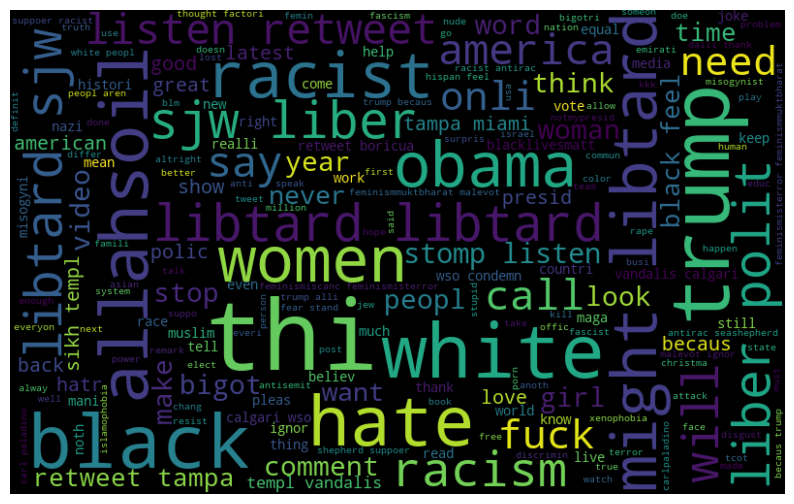

In [18]:
# Visualizing the negative words
all_words = " ".join([sentence for sentence in df['Clean_tweets'][df['label'] == 1]])

from wordcloud import WordCloud 
wordcloud = WordCloud(width =800 , height=500, random_state = 43, max_font_size =100).generate(all_words)

#Ploting the graph
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
# Extracting hashtags 
def hashtag_extract(tweets):
    hashtags = []
    # Running loop for each tweet in tweets 
    for tweet in tweets:
        # Find all hashtags in the tweet
        ht = re.findall(r'#(\w+)', tweet)
        # Extend the hashtags list with found hashtags
        hashtags.extend(ht)
    return hashtags

In [20]:
# Extracting hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['Clean_tweets'][df['label']==0])

# Extracting hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['Clean_tweets'][df['label']==1])


In [21]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [22]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [23]:
freq = nltk.FreqDist(ht_positive)
df2 = pd.DataFrame({
    'Hashtags': list(freq.keys()),
    'Count': list(freq.values())
})

df2.head()

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [24]:
freq2 = nltk.FreqDist(ht_negative)
df3 = pd.DataFrame({
    'Hashtags': list(freq2.keys()),
    'Count': list(freq2.values())
})

df3.head()

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


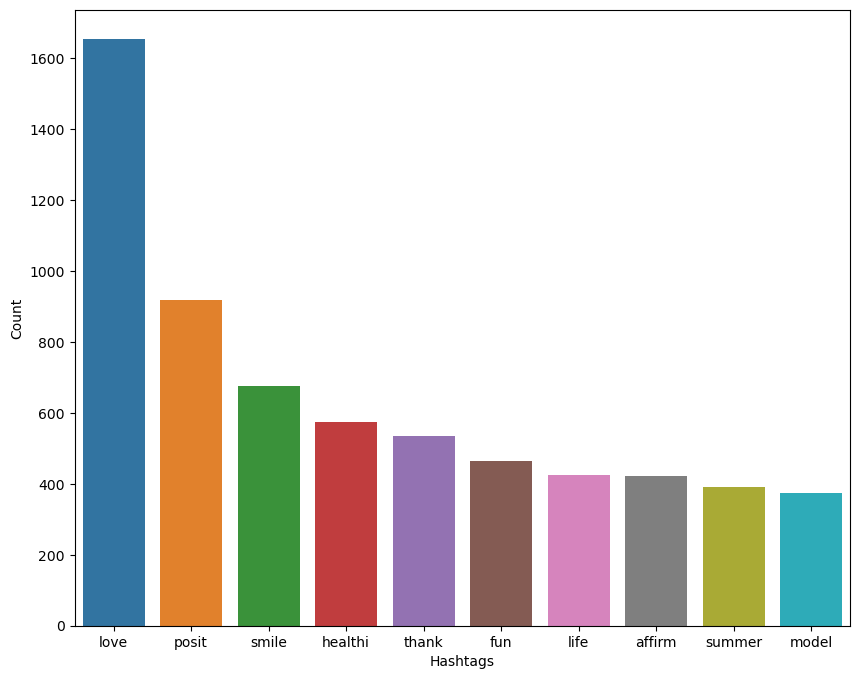

In [25]:
# visulizing top 10 positive hashtags
df2 = df2.nlargest(columns='Count',n=10)
plt.figure(figsize=(10,8))
sns.barplot(data=df2, x='Hashtags',y='Count')
plt.show()

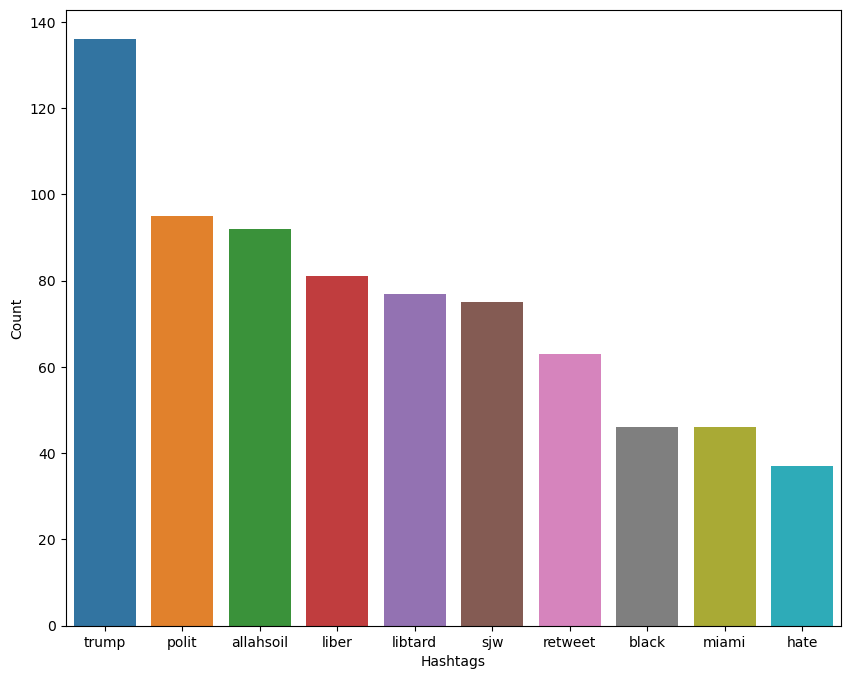

In [26]:
# visulizing top 10 negative hashtags 
df3 = df3.nlargest(columns='Count',n=10)
plt.figure(figsize=(10,8))
sns.barplot(data=df3, x='Hashtags',y='Count')
plt.show()

# Input Split

In [27]:
# Feature Extraction ( Generating bag of words)
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['Clean_tweets'])

In [28]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [29]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(bow, df['label'],test_size=0.25,random_state=42)

# Model Training 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [31]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
 # Testing the model and checking f1 score
predict = model.predict(x_test)
f1_score(y_test,predict)

0.4970414201183432

In [33]:
# Checking model Accuracy
accuracy_score(y_test, predict)

0.9468151670629458

In [34]:
# using probablity to get output 
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(int)

f1_score(y_test,pred)

0.5540275049115914

In [35]:
accuracy_score(y_test, pred)

0.943186084344888

In [37]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)